### Ho Ngoc Minh Duc

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000
mean,151.818810,154.145190,149.361619,151.584762,151.561595,2.327641e+06,3919.237300
std,49.350352,50.127368,48.597083,49.420366,49.401844,2.081348e+06,4547.900775
min,81.100000,82.800000,80.000000,81.000000,80.950000,3.961000e+04,37.040000
25%,120.750000,122.675000,119.000000,120.600000,120.550000,1.147086e+06,1462.815000
50%,142.250000,144.300000,140.425000,142.000000,141.950000,1.768579e+06,2552.165000
75%,159.000000,161.500000,156.825000,158.712500,158.762500,2.795726e+06,4548.082500
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2100 non-null   object 
 1   Open                  2100 non-null   float64
 2   High                  2100 non-null   float64
 3   Low                   2100 non-null   float64
 4   Last                  2100 non-null   float64
 5   Close                 2100 non-null   float64
 6   Total Trade Quantity  2100 non-null   float64
 7   Turnover (Lacs)       2100 non-null   float64
dtypes: float64(7), object(1)
memory usage: 131.4+ KB


In [12]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


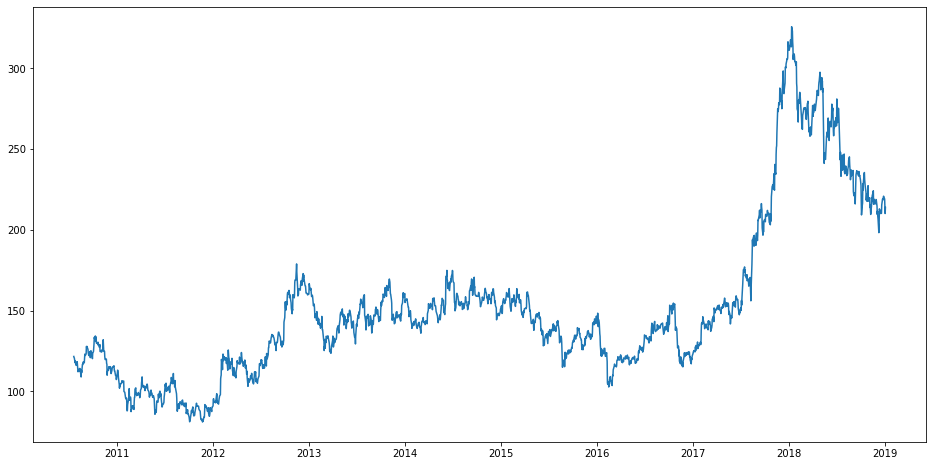

In [13]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [78]:
data=df.sort_index(ascending=True,axis=0)
new_dataset = df[['Date', 'Close']].drop(['Date'], axis=1)

In [68]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [20]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [21]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 18s - loss: 0.0010 - 18s/epoch - 19ms/step


In [22]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [24]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

35/35 [==============================] - 1s 14ms/step


C:\Users\Minh Duc\AppData\Local\Temp\ipykernel_15008\4128311284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=closing_price


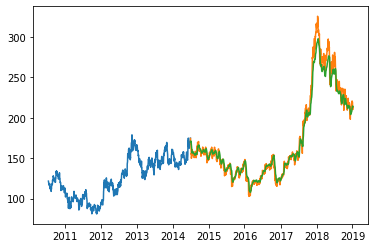

In [27]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])